In [1]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=2acb437b70beed8e50a706c5be6a9631964ff481fe6da13211df0422f85b2f1a
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [4]:
!pip install pandas_datareader

In [5]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import style 

In [6]:


df=web.DataReader("UAL",data_source='yahoo',start='01-01-2011',end='31-01-2022')         # Stock used -> TESLA
df.head()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,25.15,24.100000,24.129999,25.129999,7636700,25.129999
2011-01-04,25.92,25.200001,25.299999,25.530001,7163100,25.530001
2011-01-05,26.23,25.250000,25.530001,25.350000,7953300,25.350000
2011-01-06,25.90,25.250000,25.430000,25.750000,5933200,25.750000
2011-01-07,26.08,25.450001,25.750000,25.950001,4370400,25.950001


In [7]:
df.shape

(2789, 6)

Text(0.5, 1.0, 'UNITED AIRLINES STOCK PRICE')

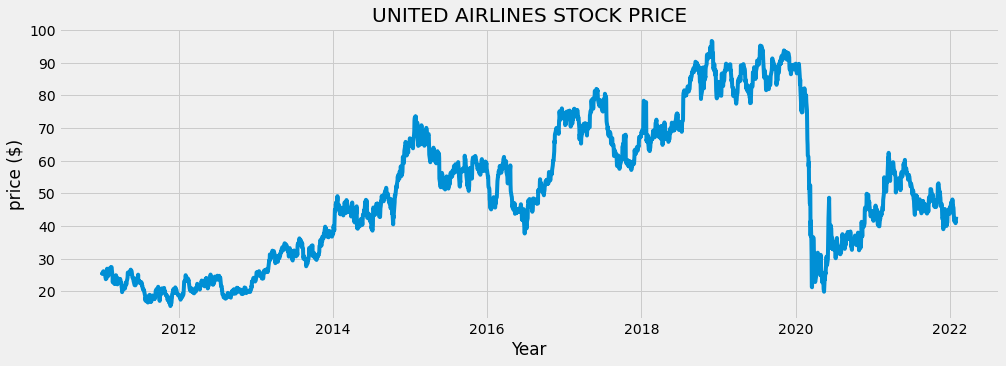

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(1,(15,5))
graph=plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("price ($)")
plt.title("UNITED AIRLINES STOCK PRICE")

In [10]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)

In [11]:
dataset

array([[25.12999916],
       [25.53000069],
       [25.35000038],
       ...,
       [40.93000031],
       [40.90999985],
       [42.88000107]])

In [12]:
training_data_len

2232

Scaling The Data


In [13]:


from sklearn.preprocessing import MinMaxScaler



In [14]:


scaler=MinMaxScaler(feature_range=(0,1),copy=True)
scaled_data=scaler.fit_transform(dataset)
scaled_data



array([[0.11827029],
       [0.12319824],
       [0.12098067],
       ...,
       [0.31292351],
       [0.31267711],
       [0.33694718]])

In [15]:
train_data=scaled_data[0:training_data_len,:]
x_train,y_train=[],[]
for i in range(60,len(train_data)):                 
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print("x_train",x_train)
    print("y_train",y_train)
    print()

x_train [array([0.11827029, 0.12319824, 0.12098067, 0.12590859, 0.12837257,
       0.13145252, 0.12516941, 0.12775656, 0.12849575, 0.12751016,
       0.11691513, 0.10903043, 0.10656648, 0.10126895, 0.10582729,
       0.10545769, 0.1264014 , 0.14081557, 0.12714058, 0.12159665,
       0.11987188, 0.11371197, 0.12443021, 0.12467661, 0.13416288,
       0.13822842, 0.13662685, 0.13588764, 0.14488113, 0.14056919,
       0.14364915, 0.14722188, 0.1468523 , 0.14032279, 0.10976963,
       0.08931873, 0.10570409, 0.10373292, 0.10484171, 0.09227548,
       0.08599237, 0.09239868, 0.08291242, 0.09584822, 0.11395837,
       0.10841444, 0.11605275, 0.11334237, 0.1042257 , 0.09954418,
       0.08993471, 0.08180363, 0.09658743, 0.1039793 , 0.09757301,
       0.09350747, 0.09806579, 0.09831219, 0.09757301, 0.09042751])]
y_train [0.10237773444266288]



In [16]:
x_train

[array([0.11827029, 0.12319824, 0.12098067, 0.12590859, 0.12837257,
        0.13145252, 0.12516941, 0.12775656, 0.12849575, 0.12751016,
        0.11691513, 0.10903043, 0.10656648, 0.10126895, 0.10582729,
        0.10545769, 0.1264014 , 0.14081557, 0.12714058, 0.12159665,
        0.11987188, 0.11371197, 0.12443021, 0.12467661, 0.13416288,
        0.13822842, 0.13662685, 0.13588764, 0.14488113, 0.14056919,
        0.14364915, 0.14722188, 0.1468523 , 0.14032279, 0.10976963,
        0.08931873, 0.10570409, 0.10373292, 0.10484171, 0.09227548,
        0.08599237, 0.09239868, 0.08291242, 0.09584822, 0.11395837,
        0.10841444, 0.11605275, 0.11334237, 0.1042257 , 0.09954418,
        0.08993471, 0.08180363, 0.09658743, 0.1039793 , 0.09757301,
        0.09350747, 0.09806579, 0.09831219, 0.09757301, 0.09042751]),
 array([0.12319824, 0.12098067, 0.12590859, 0.12837257, 0.13145252,
        0.12516941, 0.12775656, 0.12849575, 0.12751016, 0.11691513,
        0.10903043, 0.10656648, 0.10126895, 0.

In [17]:
y_train

[0.10237773444266288,
 0.09190588017839033,
 0.0912898984268086,
 0.08894912547404235,
 0.076629302456827,
 0.0702229888483076,
 0.06738943519391552,
 0.05248246062221981,
 0.06147592578521957,
 0.07613649825700355,
 0.07194778004949212,
 0.06591104609264273,
 0.06763583729382724,
 0.07009978779835177,
 0.07453493160397254,
 0.06775903834378313,
 0.06541826539101689,
 0.08007886136099843,
 0.08685475462118783,
 0.08931872862390997,
 0.08106444626244777,
 0.0898115093255358,
 0.09843539483686556,
 0.10287051514428872,
 0.10915362770285228,
 0.1264013987255118,
 0.12467660752432733,
 0.12098067001844173,
 0.12615499662560006,
 0.1275101611787194,
 0.12270543772142864,
 0.12381422367283382,
 0.13083651903293494,
 0.1335468951355688,
 0.12812616642849875,
 0.13736603369141023,
 0.13514846178859988,
 0.132068506034296,
 0.1254157903258649,
 0.1176543121642262,
 0.11223358345715609,
 0.10755206104982121,
 0.1061968729985043,
 0.09584821978418764,
 0.09252188542816966,
 0.08870272337413063,
 

In [18]:
#Reshape the data
x_train,y_train=np.array(x_train),np.array(y_train)     
#convert into array to use in lstm model
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2172, 60, 1)

LSTM MODEL

In [22]:

!pip install keras
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=9d1c02430ca09b6f02279bd7d66baf100fd689dfdb70390a6134894d10a3b177
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [23]:


model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [24]:


model.compile(optimizer='adam',loss='mean_squared_error')



Training the Model

In [26]:


model.fit(x_train,y_train,batch_size=1,epochs=1)



2172/2172 [==============================] - 23s 11ms/step - loss: 7.3636e-04


In [27]:


#Testing the Model

test_data=scaled_data[training_data_len - 60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
type(y_test)



numpy.ndarray

In [28]:


#convert into array X_test
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape



(557, 60, 1)

In [29]:


predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:


rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse



0.9717334733617156

C:\Users\kumar\AppData\Local\Temp/ipykernel_19744/1106319275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions']=predictions


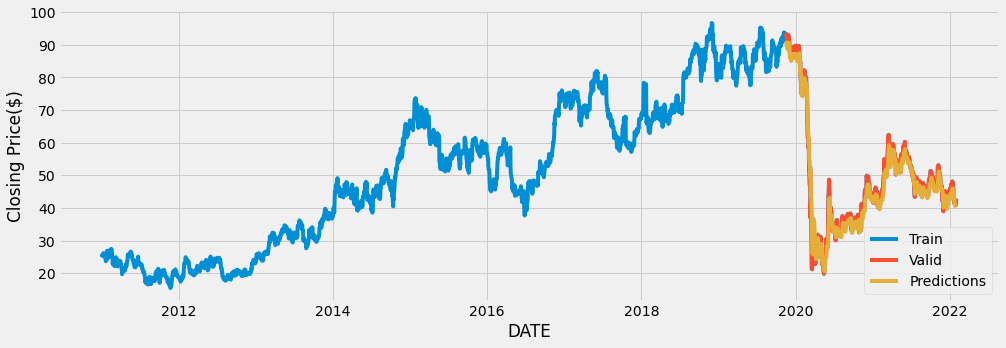

In [31]:


train1=data[:training_data_len]
validation=data[training_data_len:]
validation['Predictions']=predictions
plt.figure(figsize=(15,5))
plt.xlabel("DATE")
plt.ylabel("Closing Price($)")
plt.plot(df['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()



In [35]:


#Predicting stock proce of next day
sample=web.DataReader("UAL",data_source='yahoo',start='01-01-2011',end='31-01-2022')
new_df=sample.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[[41.25068]]


In [39]:
#Conclusion

sample2=web.DataReader("UAl",data_source='yahoo',start='01-01-2011',end='02-02-2022')
print(sample2['Close'])

Date
2011-01-03    25.129999
2011-01-04    25.530001
2011-01-05    25.350000
2011-01-06    25.750000
2011-01-07    25.950001
                ...    
2022-01-27    40.930000
2022-01-28    40.910000
2022-01-31    42.880001
2022-02-01    43.959999
2022-02-02    44.250000
Name: Close, Length: 2791, dtype: float64
